In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sklearn.preprocessing
import mglearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mlxtend.frequent_patterns import apriori
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

## Data Processing

In [2]:
H2015 = pd.read_csv('https://raw.githubusercontent.com/sauchilee/Stat517/master/Data/World_Happiness_2015.csv')
H2016 = pd.read_csv('https://raw.githubusercontent.com/sauchilee/Stat517/master/Data/World_Happiness_2016.csv')
H2017 = pd.read_csv('https://raw.githubusercontent.com/sauchilee/Stat517/master/Data/World_Happiness_2017.csv')
display(H2015.head(5))

H2015 = pd.get_dummies(H2015, columns =[u'Country','Region'])
data = H2015.drop([u'Happiness Rank',u'Happiness Score'], axis=1)
features = list(data)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Principal Component Analysis

In [3]:
# keep the first n principal components of the data
pca = PCA(n_components=100)
# fit PCA model to data
pca.fit(data)

# transform data onto the first two principal components
X_pca = pca.transform(data)
print("Original shape: {}".format(data.shape))
print("Reduced shape: {}".format(X_pca.shape))

Original shape: (158, 176)
Reduced shape: (158, 100)


## Part A: Clustering

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
clust = ['Kmeans','Hierarchal','Gaussian Mixture']

## K-Means

Text(0.5,1,'Gaussian Mixture Clusters, n = 60')

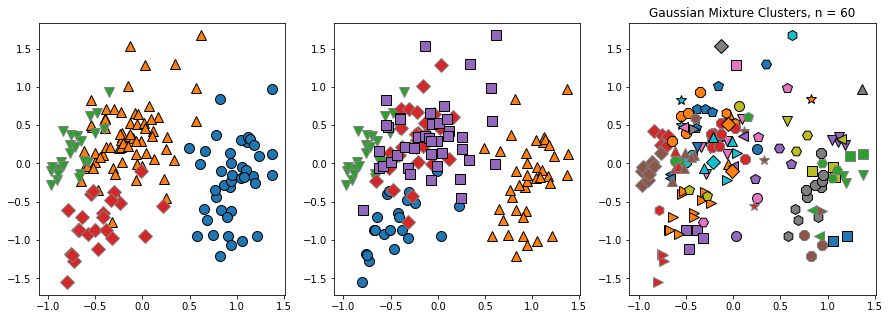

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# using two cluster centers:
n = 4
kmeans = KMeans(n_clusters=n)
kmeans.fit(X_pca)
assignments = kmeans.labels_
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], assignments, ax=axes[0])
plt.title('{:} Clusters, n = {:}'.format(clust[0],n))

# using five cluster centers:
n = 5
kmeans = KMeans(n_clusters=n)
kmeans.fit(X_pca)
assignments = kmeans.labels_
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], assignments, ax=axes[1])

# using five cluster centers:
n = 60
kmeans = KMeans(n_clusters=n)
kmeans.fit(X_pca)
assignments = kmeans.labels_
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], assignments, ax=axes[2])
plt.title('{:} Clusters, n = {:}'.format(clust[2],n))

## Optimal Number of Cluster
Silhouette Analysis: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For n_clusters = 2 The average silhouette_score is : 0.169289895403187
For n_clusters = 3 The average silhouette_score is : 0.16565112171286797
For n_clusters = 4 The average silhouette_score is : 0.19380538017674864
For n_clusters = 5 The average silhouette_score is : 0.2295088289589743
For n_clusters = 6 The average silhouette_score is : 0.2495463561153663
For n_clusters = 7 The average silhouette_score is : 0.265512634198296
For n_clusters = 8 The average silhouette_score is : 0.23310669201114262
For n_clusters = 9 The average silhouette_score is : 0.24245287016226355
For n_clusters = 10 The average silhouette_score is : 0.20292985056375207


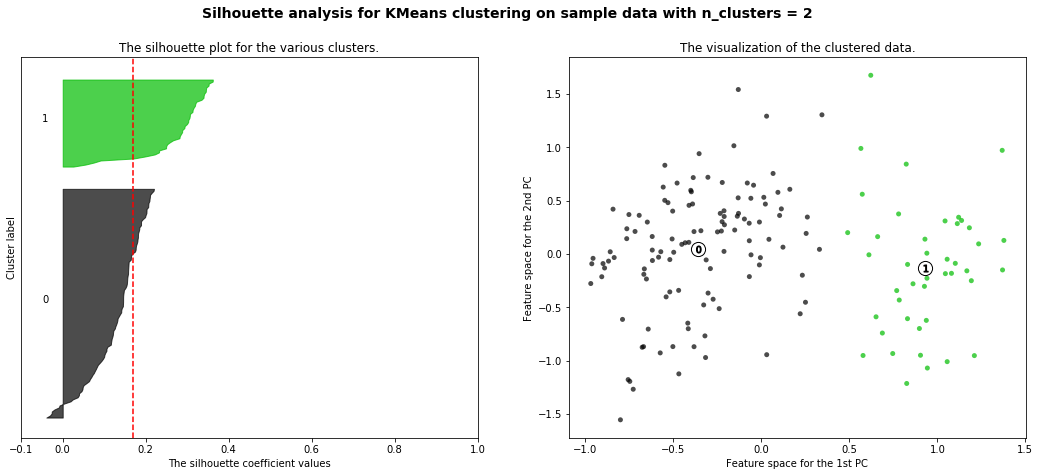

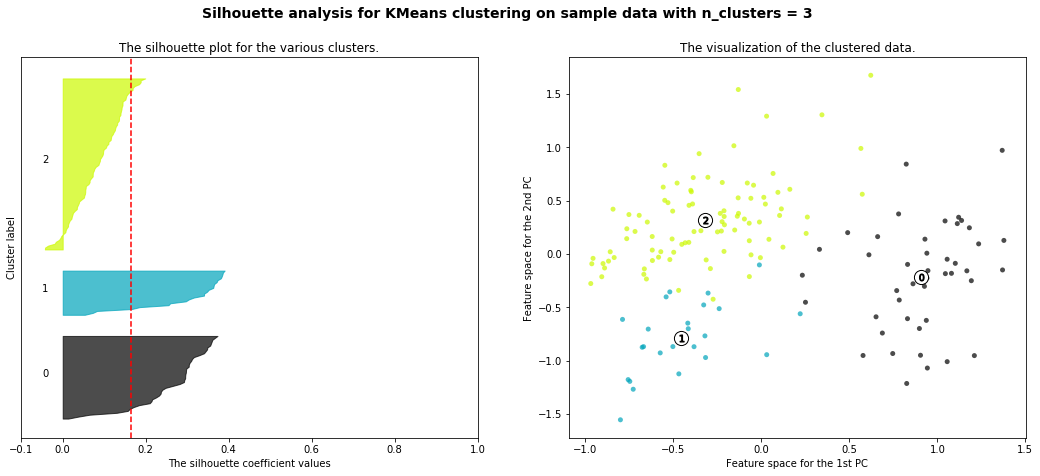

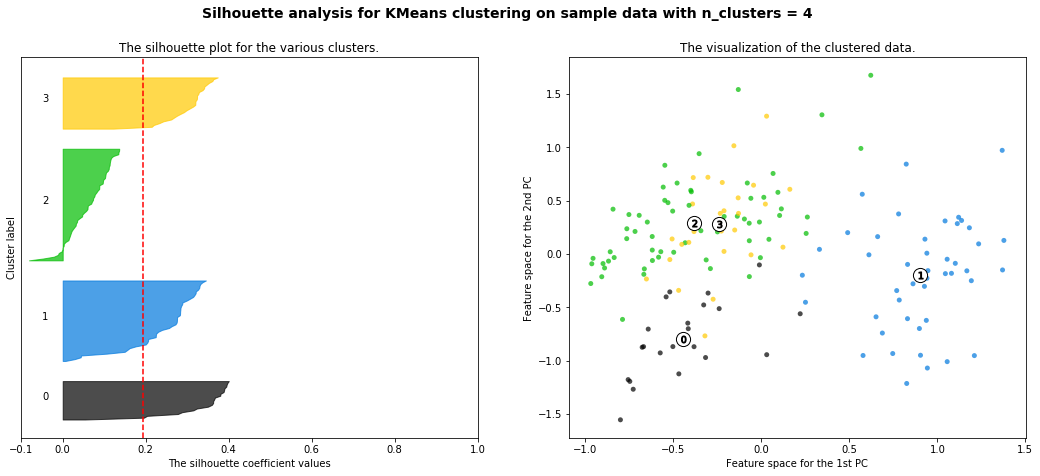

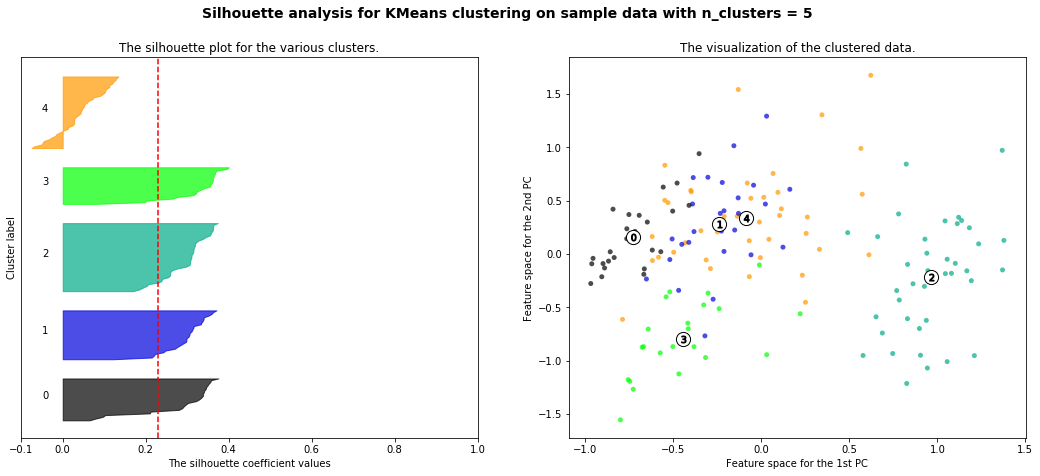

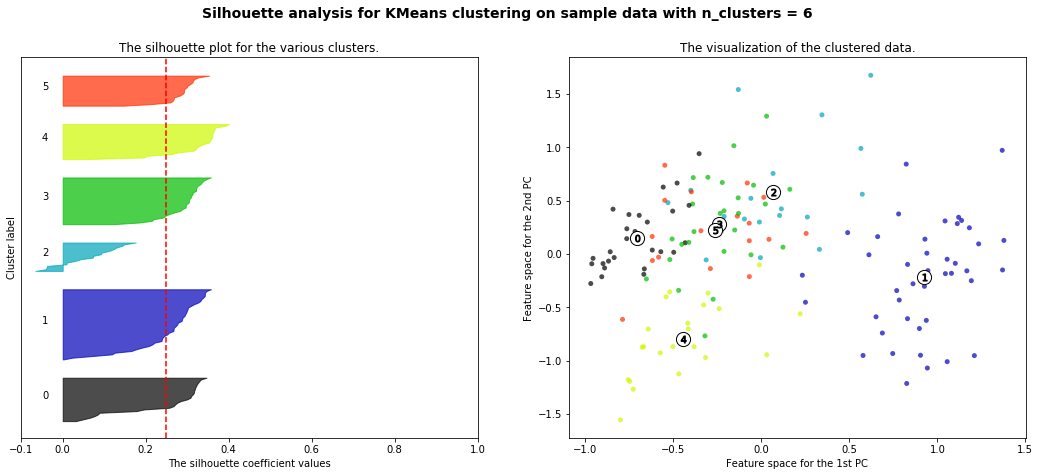

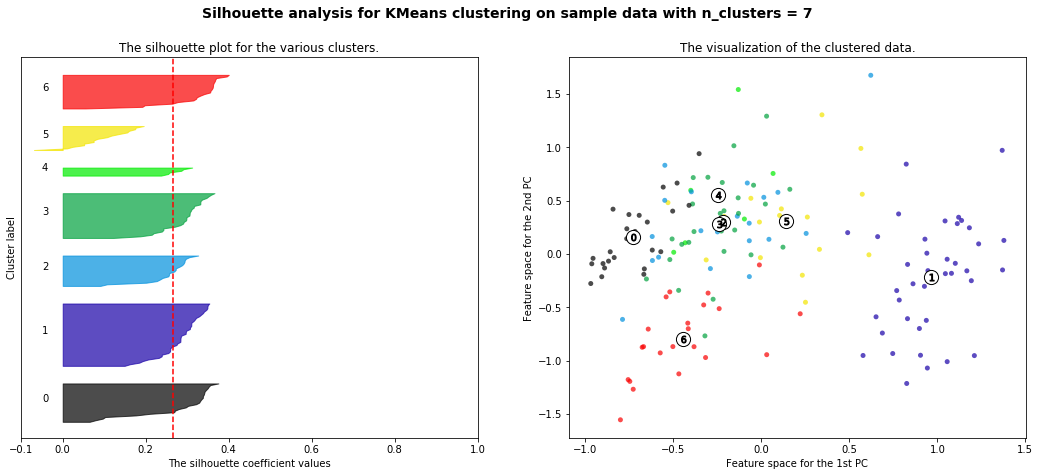

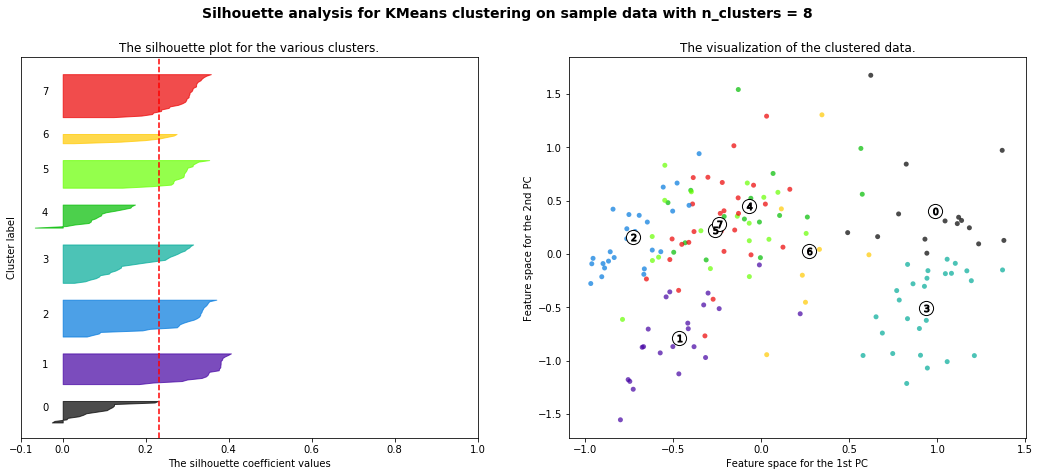

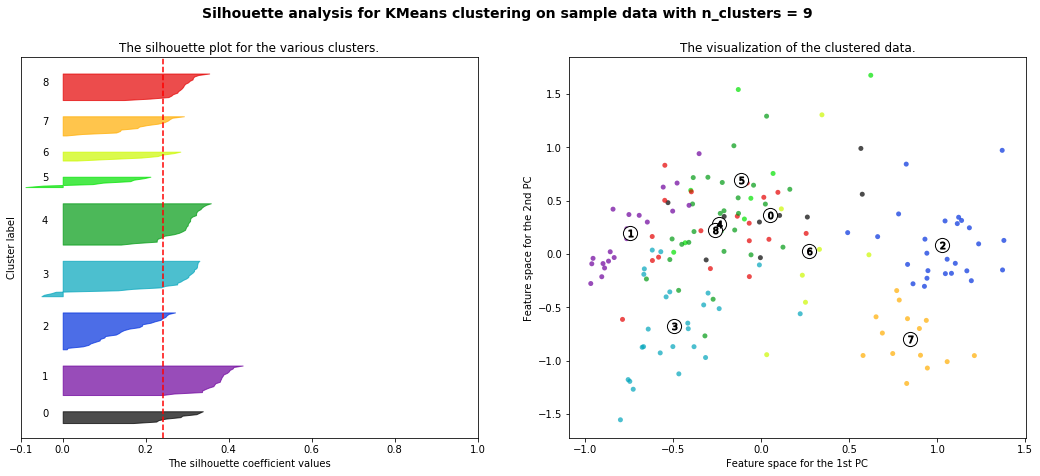

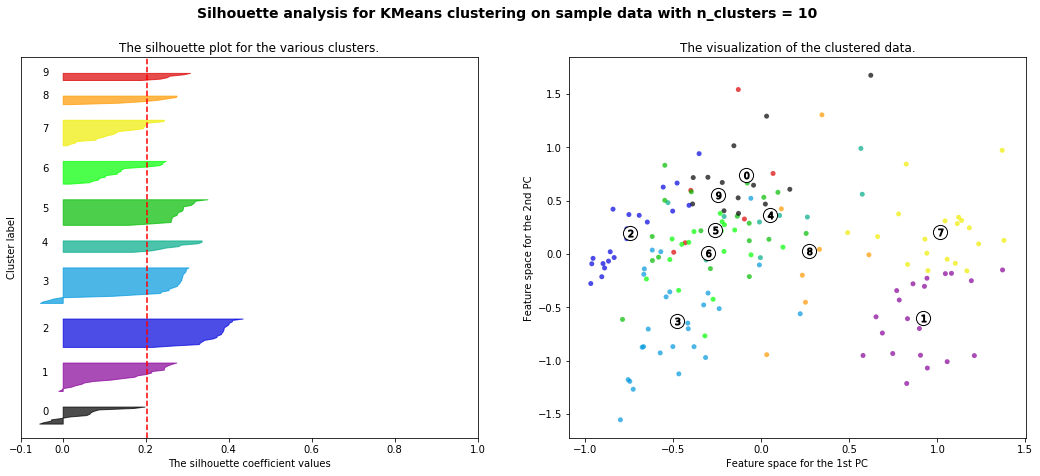

In [14]:
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
X = X_pca
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=100, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st PC")
    ax2.set_ylabel("Feature space for the 2nd PC")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Analysis:
From the Silhouette graphs above, the optimal number of clusters for Kmean clustiner is 7 becuase it has the highest S avg. $$S(i) = b(i) - a(i)/max[a(i),b(i)] $$

## Heirarchal Clustering

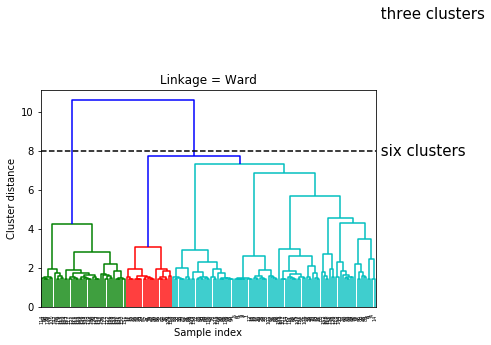

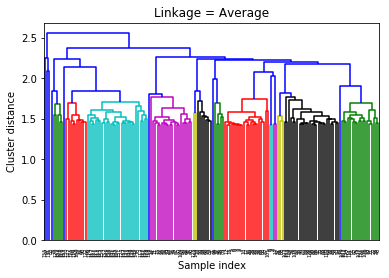

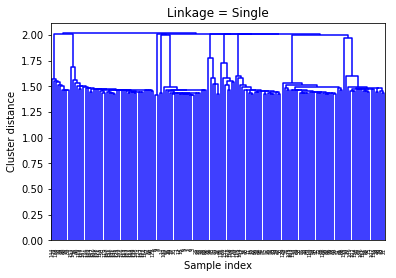

In [281]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward, average, single
linkage_array1 = ward(data)
linkage_array2 = average(data)
linkage_array3 = single(data)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters

dendrogram(linkage_array1)
# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [15, 15], '--', c='k')
ax.plot(bounds, [8, 8], '--', c='k')

ax.text(bounds[1], 15, ' three clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 8, ' six clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.title('Linkage = Ward')
plt.show()

dendrogram(linkage_array2)
# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [20, 20], '--', c='k')
ax.plot(bounds, [10, 10], '--', c='k')

#ax.text(bounds[1], 20, ' three clusters', va='center', fontdict={'size': 15})
#ax.text(bounds[1], 10, ' five clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.title('Linkage = Average')
plt.show()

dendrogram(linkage_array3)
# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [20, 20], '--', c='k')
ax.plot(bounds, [10, 10], '--', c='k')

#ax.text(bounds[1], 20, ' three clusters', va='center', fontdict={'size': 15})
#ax.text(bounds[1], 10, ' five clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.title('Linkage = Single')
plt.show()

Text(0.5,1,'Hierarchal Clusters')

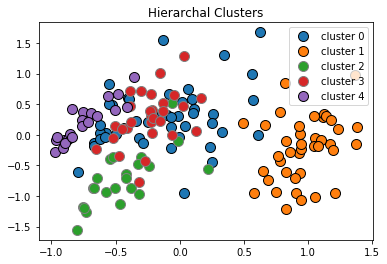

In [282]:
HC = AgglomerativeClustering(5).fit(X_pca)
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], HC.labels_, markers='o')
plt.legend(["cluster 0", "cluster 1", "cluster 2","cluster 3","cluster 4"], loc='best')
plt.title('{:} Clusters'.format(clust[1]))

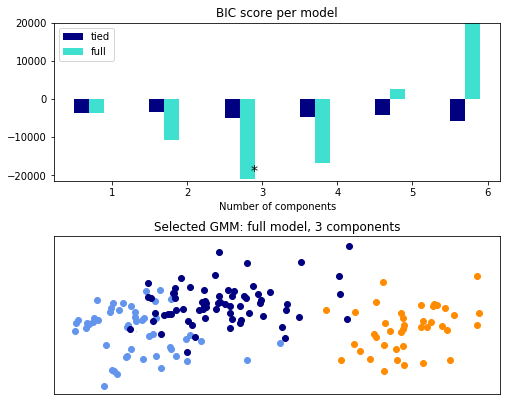

In [283]:
import matplotlib as mpl
X = X_pca
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['tied', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: full model, 3 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

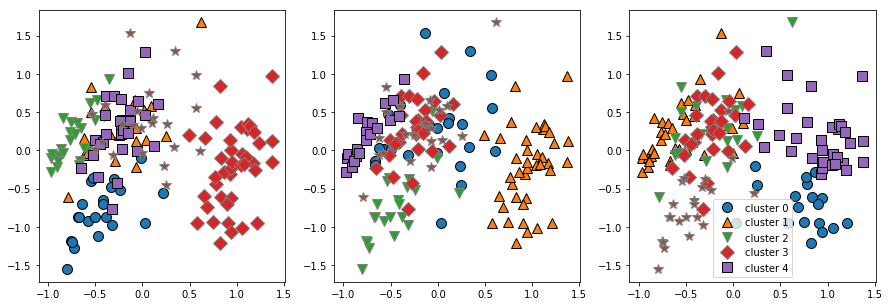

In [284]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
n = 6

# using two cluster centers:
kmeans = KMeans(n_clusters=n)
kmeans.fit(X_pca)
assignments = kmeans.labels_
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], assignments, ax=axes[0])


# using five cluster centers:
HC = AgglomerativeClustering(n_clusters=n).fit(X_pca)
assignments = HC.labels_
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], assignments, ax=axes[1])


# using five cluster centers:
gmm = GaussianMixture(n_components=n).fit(X_pca)
assignments =gmm.predict(X_pca)
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], assignments, ax=axes[2])

plt.legend(["cluster 0", "cluster 1", "cluster 2","cluster 3","cluster 4"], loc='best')

In [285]:
from sklearn import metrics

# Comparison
n = 4
kmeans = KMeans(n_clusters = n).fit(X_pca)
clusters1 = kmeans.labels_
print("KM Cluster memberships:\n{}".format(HC.labels_))

HC = AgglomerativeClustering(n).fit(X_pca)
clusters2 = HC.labels_
print("HC Cluster memberships:\n{}".format(HC.labels_))

HC = AgglomerativeClustering(n).fit(X_pca)
clusters2 = HC.labels_
print("HC Cluster memberships:\n{}".format(HC.labels_))


print('Kmeans & GMM: ',metrics.adjusted_mutual_info_score(kmeans.labels_,gmm_labels))
print('HC & GMM: ',metrics.adjusted_mutual_info_score(HC.labels_,gmm_labels))
print('Kmeans & HC: ',metrics.adjusted_mutual_info_score(kmeans.labels_,HC.labels_))

KM Cluster memberships:
[4 4 4 4 0 4 4 4 0 0 5 2 4 2 0 2 4 4 4 5 4 5 2 0 2 4 2 5 4 2 3 2 2 0 5 4 4
 0 5 2 2 2 2 3 3 0 0 2 5 4 2 3 2 3 3 3 2 2 3 3 0 3 5 3 2 4 4 5 3 3 1 0 3 0
 0 5 3 1 0 3 0 5 3 0 1 3 3 4 3 0 1 5 3 1 3 3 1 2 0 0 1 4 5 3 2 3 5 5 0 5 3
 5 1 1 1 1 0 1 2 1 0 1 1 1 1 1 3 1 0 3 1 0 1 3 5 5 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 5 1 1]
HC Cluster memberships:
[0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 2 0 2 0 2 0 0 2 3 2 2 0 0 0 0
 0 0 2 2 2 2 3 3 0 0 2 0 0 2 3 2 3 3 3 2 2 3 3 0 3 0 3 2 0 0 0 3 3 1 0 3 0
 0 0 3 1 0 3 0 0 3 0 1 3 3 0 3 0 1 0 3 1 3 3 1 2 0 0 1 0 0 3 2 3 0 0 0 0 3
 0 1 1 1 1 0 1 2 1 0 1 1 1 1 1 3 1 0 3 1 0 1 3 0 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 0 1 1]
HC Cluster memberships:
[0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 2 0 2 0 2 0 0 2 3 2 2 0 0 0 0
 0 0 2 2 2 2 3 3 0 0 2 0 0 2 3 2 3 3 3 2 2 3 3 0 3 0 3 2 0 0 0 3 3 1 0 3 0
 0 0 3 1 0 3 0 0 3 0 1 3 3 0 3 0 1 0 3 1 3 3 1 2 0 0 1 0 0 3 2 3 0 0 0 0 3
 0 1 1 1 1 0 1 2 1 0 1 1 1 1 1 3 1 0 3 1 0 1 3 0 0 1 1 1 1 

In [286]:
labels = kmeans.labels_
labels = pd.DataFrame(labels)
labels.columns = ['group']
data = pd.merge(data, labels, left_index=True, right_index=True)
data.head()
y = data['group']
X = data.drop(['group'],axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

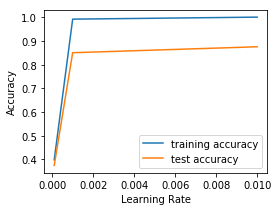

In [287]:
# tune learning rate hyperparameter
from sklearn.ensemble import GradientBoostingClassifier
training_accuracy = []
test_accuracy = []
# try C from 0.0001 to 100
rate = [0.0001,0.001,0.01]
for rate in rate:
    # build the model
    gbrt = GradientBoostingClassifier(random_state=0, learning_rate=rate)
    gbrt.fit(X_train, np.ravel(y_train))
    # record training set accuracy
    training_accuracy.append(gbrt.score(X_train, np.ravel(y_train)))
    # record generalization accuracy
    test_accuracy.append(gbrt.score(X_test, np.ravel(y_test)))
rate = [0.0001,0.001,0.01]
fig=plt.figure(figsize=(4, 3))
plt.plot(rate, training_accuracy, label="training accuracy")
plt.plot(rate, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Learning Rate")
plt.legend()

In [288]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth = 1,learning_rate = 0.01)
gbrt.fit(X_train, np.ravel(y_train))

GBtra = gbrt.score(X_train, np.ravel(y_train))
GBtea = gbrt.score(X_test, np.ravel(y_test))

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, np.ravel(y_train))))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, np.ravel(y_test))))
X_features = X.columns

Accuracy on training set: 1.000
Accuracy on test set: 0.900


Text(0,0.5,'Feature')

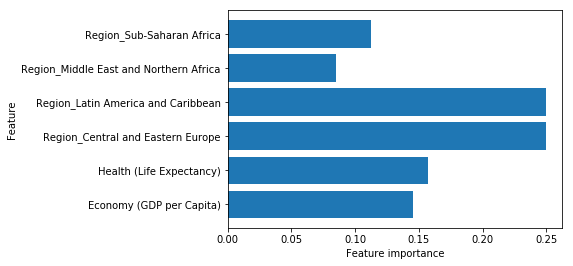

In [289]:
important_X = gbrt.feature_importances_
Factors = []
Factor_labels = []
indice_important = []
for i in range(len(important_X)):
    if important_X[i] > 0.0001:
        Factors.append(important_X[i])
        Factor_labels.append(X_features[i])
        # column indice of important feature
        indice_important.append(i)
# Graphically display the condensed list of the most important features
# in determing happiness.
n_features = Factor_labels
plt.barh(n_features, Factors, align='center')
plt.xlabel("Feature importance")
plt.ylabel("Feature")

In [290]:
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
from sklearn import mixture

Index(['Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Country_Afghanistan',
       'Country_Albania',
       ...
       'Region_Central and Eastern Europe', 'Region_Eastern Asia',
       'Region_Latin America and Caribbean',
       'Region_Middle East and Northern Africa', 'Region_North America',
       'Region_Southeastern Asia', 'Region_Southern Asia',
       'Region_Sub-Saharan Africa', 'Region_Western Europe', 'group'],
      dtype='object', length=177)


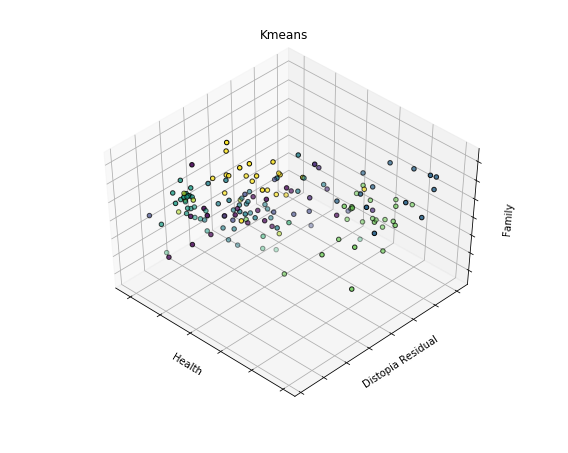

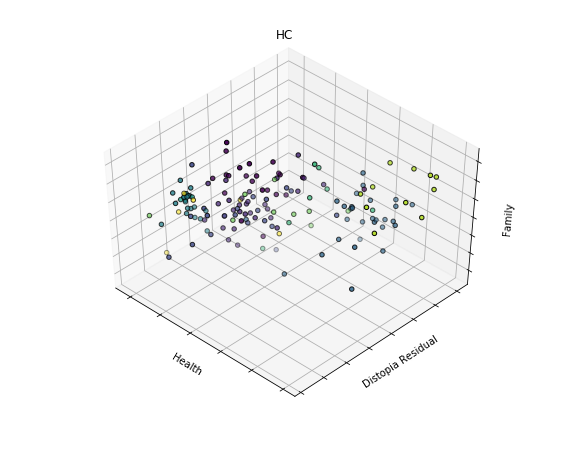

In [304]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

print(data.columns)
n = 10
HC = AgglomerativeClustering(n).fit(data)
gmm = GaussianMixture(n_components=n).fit(data)
kmeans = KMeans(n_clusters=n).fit(data)

## Enter three features you would like to visualize here:
# I chose the three that were deemed important by GBRT classification
Column = ['Health (Life Expectancy)','Economy (GDP per Capita)','Dystopia Residual']

## Compare Kmeans Cluster to Heirarchal cluster
estimators = [('k_means', kmeans),('HC', HC),]

# 3D Plot code sourced from: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#sphx-glr-auto-examples-mixture-plot-gmm-selection-py
fignum = 1
titles = ['Kmeans', 'HC', 'GMM']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X_pca)
    labels = est.labels_

    ax.scatter(data.loc[:, Column[0]], data.loc[:, Column[1]], data.loc[:, Column[2]],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Health')
    ax.set_ylabel('Distopia Residual')
    ax.set_zlabel('Family')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

## Seriation

Seriation code sourced from: https://gmarti.gitlab.io/ml/2017/09/07/how-to-sort-distance-matrix.html

In [293]:
from scipy.spatial.distance import pdist, squareform
from sklearn import datasets
from fastcluster import linkage

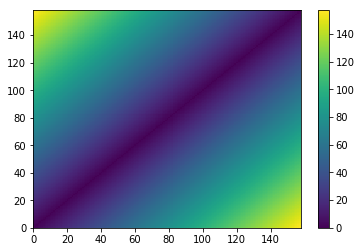

In [294]:
iris = H2015
iris.shape

dist_mat = squareform(pdist(iris))

N = len(iris)
plt.pcolormesh(dist_mat)
plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

In [295]:
def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))
    
def compute_serial_matrix(dist_mat,method="ward"):
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method,preserve_input=True)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage

Method:	 ward


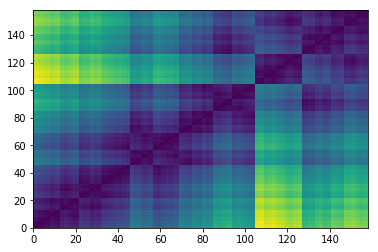

Method:	 single


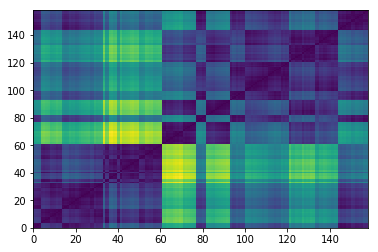

Method:	 average


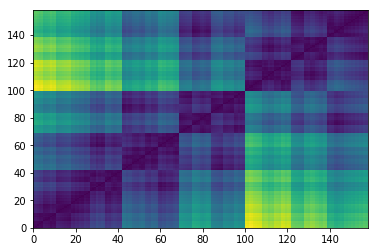

Method:	 complete


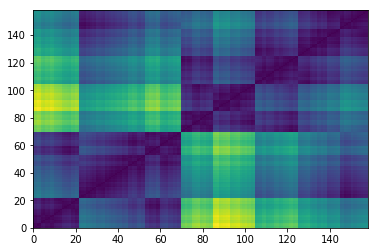

In [296]:
methods = ["ward","single","average","complete"]
for method in methods:
    print("Method:\t",method)
    
    ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(dist_mat,method)
    
    plt.pcolormesh(ordered_dist_mat)
    plt.xlim([0,N])
    plt.ylim([0,N])
    plt.show()